In [1]:
from astropy.table import Table
from astropy.cosmology import Planck13 as cosmo
from jwst_id import Analyze_JWST_LH, Likelihood_contours, Nirspec_fit,Scale_model,Oldest_galaxy
from astropy.io import fits
from scipy.interpolate import interp1d,interp2d
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.patches as patches
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, 
                             light=1.2, as_cmap=True)

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
age = np.arange(0.5,2.1,0.1)
metal = np.arange(0.004,0.028,0.001)
tau = [0, 8.0, 8.48, 8.7, 8.85, 8.95, 9.04, 9.11, 9.18, 9.23, 9.28, 9.32, 9.36, 9.4, 9.43, 9.46]
M,A=np.meshgrid(metal,age)

In [19]:
Oldest_galaxy(5)

1.1735793696082044

In [3]:
Nirspec_fit('bc03_spec-Z1a1t8.npy','prism_z5',5.0,metal,age,tau,'p_z5_bc_test',inc_err=15)

Done!


In [13]:
simwv,simfl,simer = np.load('nirspec_sim_prism_z5.npy')
twv,trans = np.load('prism_trans.npy')

In [35]:
wv,flux = np.load('/Users/vestrada/fsps_models_for_fit/fsps_spec/m0.019_a1.0_dt8.0_spec.npy')

In [5]:
add_err = np.random.normal(0,simer)

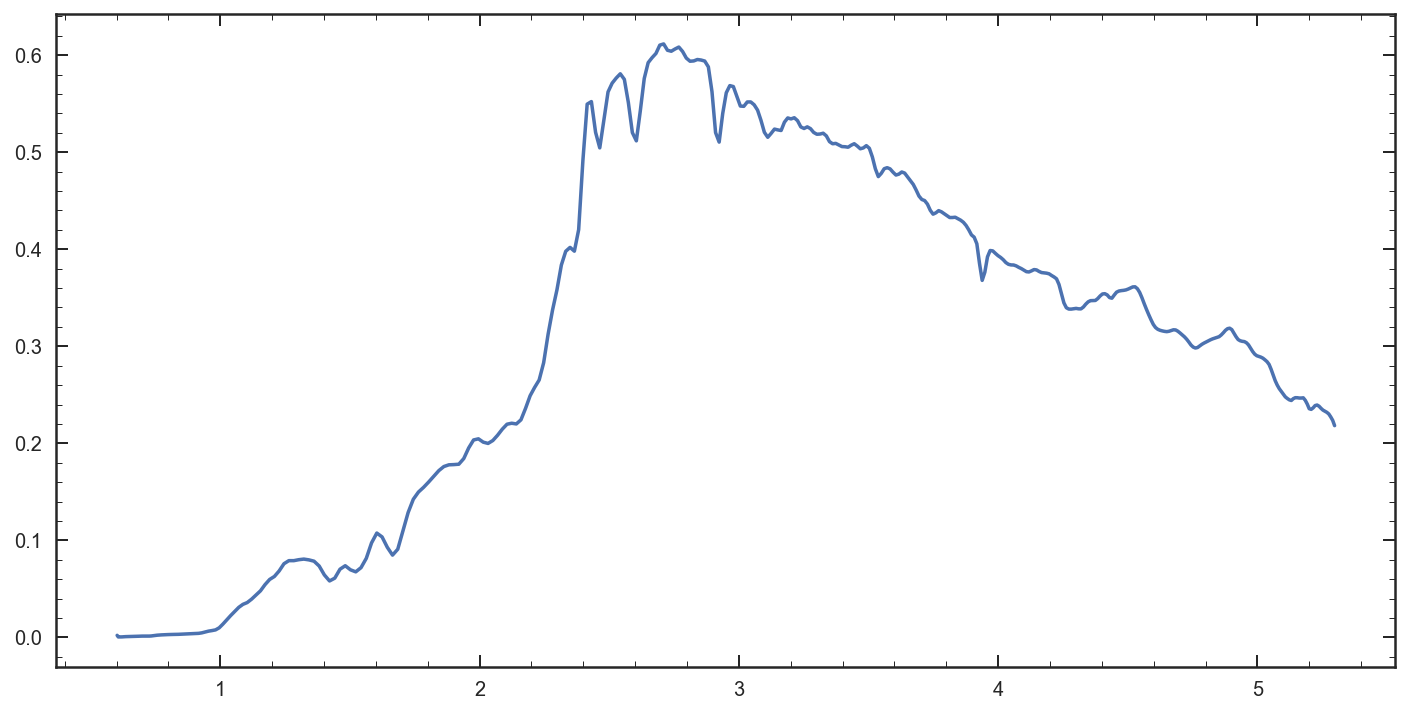

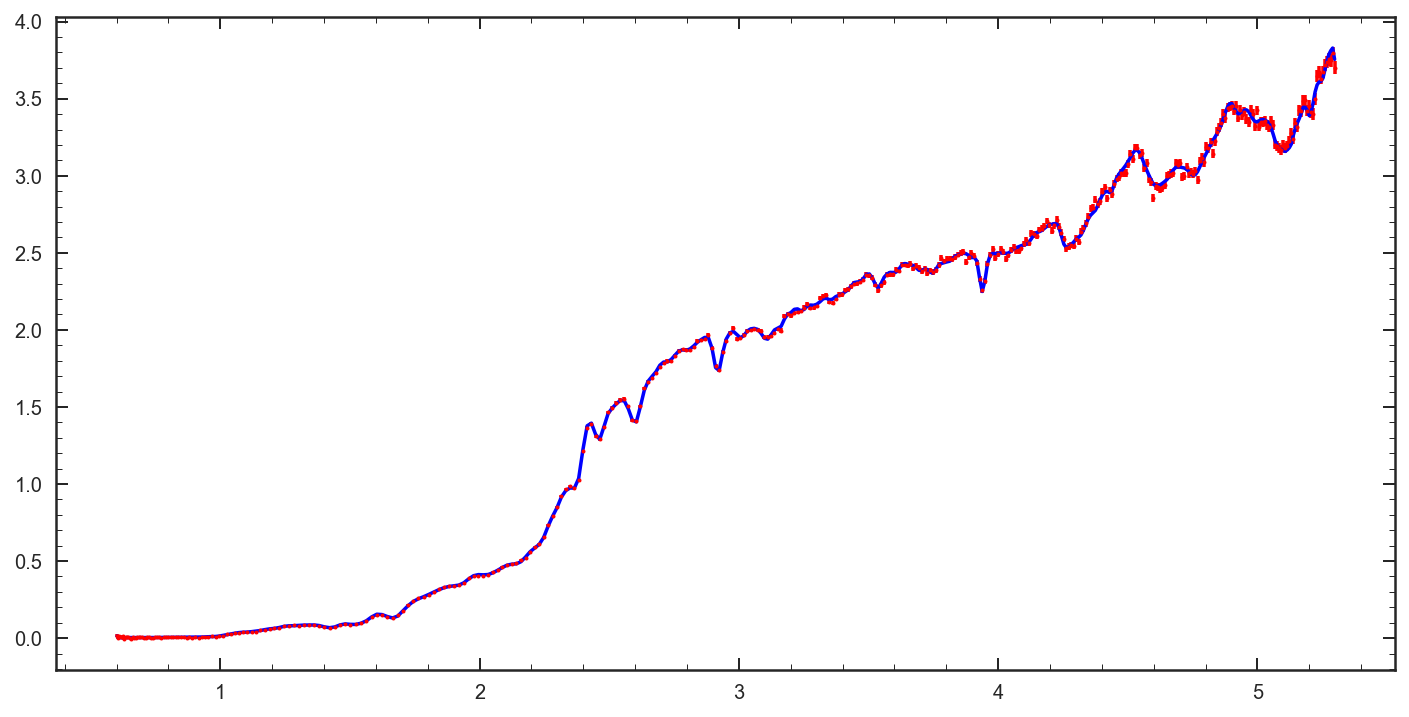

In [6]:


plt.figure(figsize=[12,6])
plt.plot(simwv,simfl)

plt.figure(figsize=[12,6])
# plt.plot(wv*1E-4,(wv**2/3E18)*flux*1.5E15)
plt.errorbar(simwv,(simfl+add_err)/trans,simer/trans,color='r',fmt='o',ms=2)
plt.plot(simwv,(simfl)/trans,'b')



In [4]:
fit_data = 'chidat/p_z5_bc_test_JWST_chidata.npy'

In [5]:
P,PZ,PT = Analyze_JWST_LH(fit_data,5.0,metal,age,tau)
levels = Likelihood_contours(age,metal,P)

(0, 9.9662437573728285996)

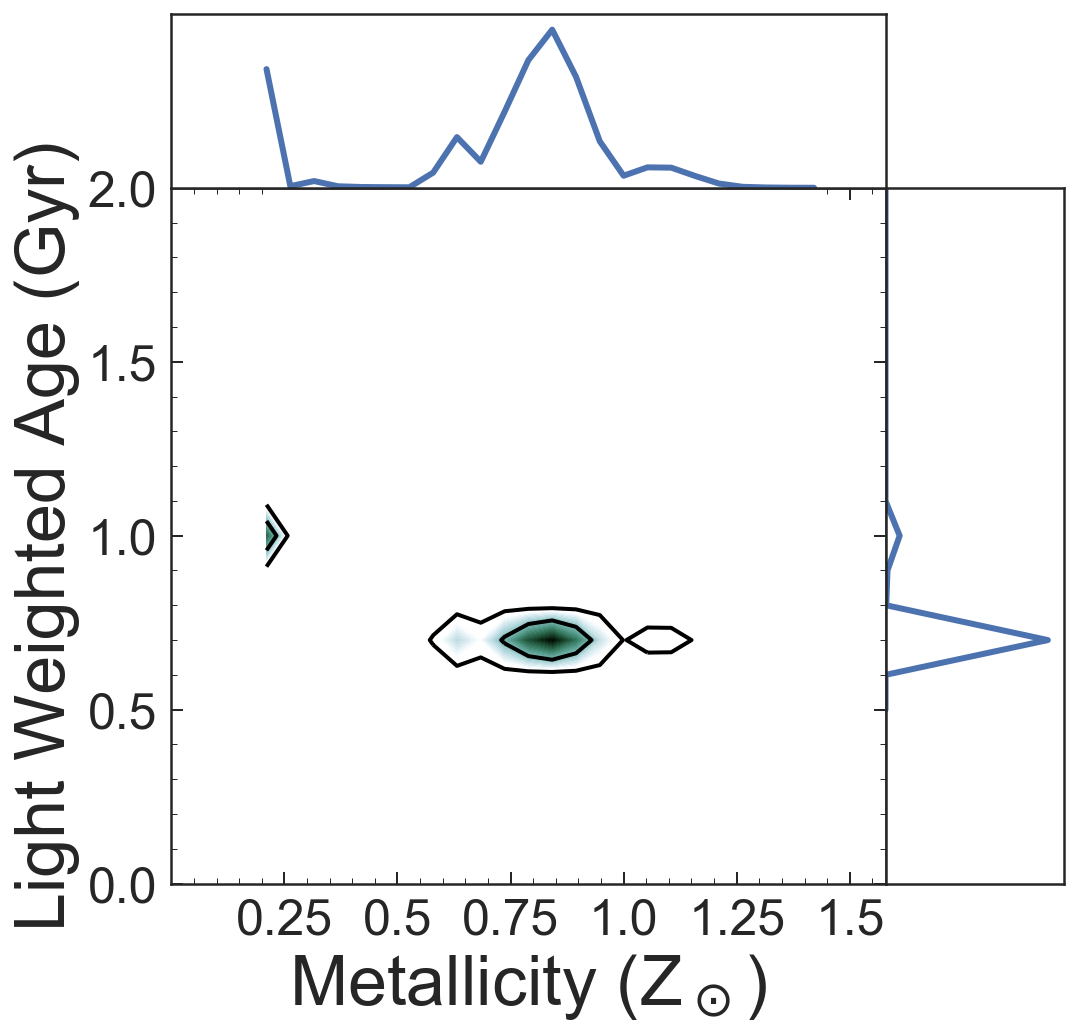

In [7]:
###PLOT

gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])

plt.subplot(gs[2])
plt.contour(M,A,P,levels,colors='k',linewidths=2)
plt.contourf(M,A,P,40,cmap=cmap)
plt.axis([0,0.03,0,2])
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Light Weighted Age (Gyr)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])

plt.subplot(gs[0])
plt.plot(metal,PZ,linewidth=3)
plt.xticks([])
plt.yticks([])
plt.xlim(0,0.03)
plt.ylim(0,max(PZ)*1.1)

plt.subplot(gs[3])
plt.plot(PT,age,linewidth=3)
plt.xticks([])
plt.yticks([])
plt.ylim(0,2)
plt.xlim(0,max(PT)*1.1)

In [17]:
wv,fl,flx,err = np.load('output/nirspec_sim_data_p_z5_bc_test.npy')
mwv,mfl=np.load('../Quiescent_analysis/JWST/m0.016_a0.7_t8.0_prism_z5.npy')
# mwv,mfl=np.load('../Quiescent_analysis/JWST/m0.019_a1.0_t8.0_prism_z5.npy')

In [23]:
wv.size

403

In [18]:
C = Scale_model(flx,err,(mwv**2/3E18)*mfl)

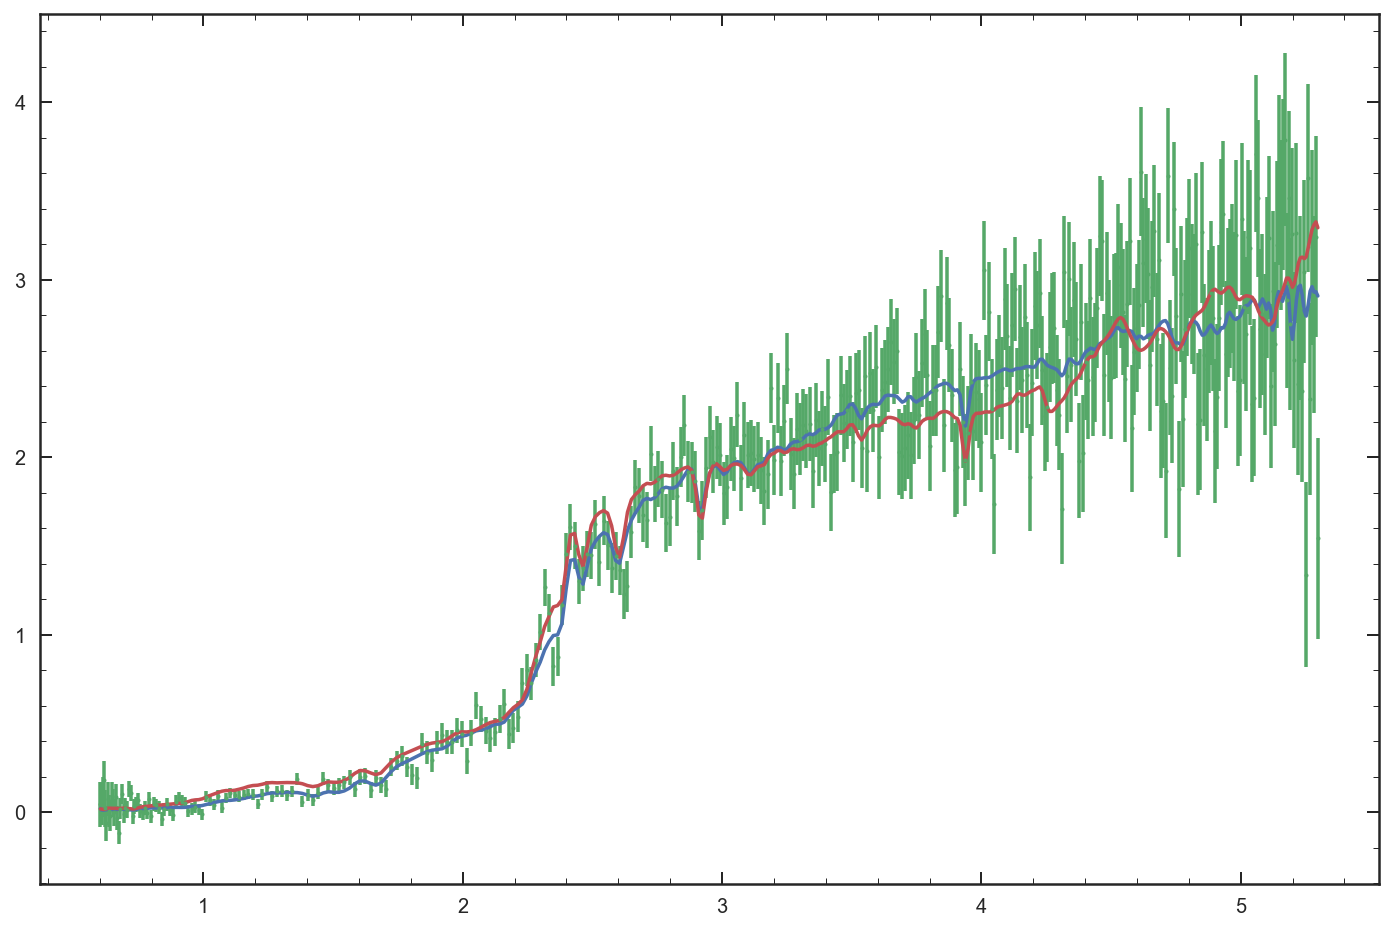

In [19]:
plt.figure(figsize=[12,8])
plt.plot(wv,fl/trans)
plt.errorbar(wv,flx/trans,err/trans,fmt='o',ms=2)
plt.plot(mwv,(mwv**2/3E18)*mfl/trans*C)
# plt.xlim(0,6)

In [15]:
np.where(P == P.max())

(array([2]), array([12]))

In [16]:
age[2],metal[12]

(0.69999999999999996, 0.016)